In [7]:
#roi raw activation from selectivity_summary file
import pandas as pd
import numpy as np
from plotnine import (ggplot, aes, geom_point, geom_linerange, theme_classic, labs,
                      scale_color_manual, scale_shape_manual, theme, element_text, element_line, element_blank,
                      coord_cartesian, scale_x_discrete, guides, guide_legend)

# Read the CSV data with updated path
#data = pd.read_csv("/results/tools/selectivity/selectivity_summarytoolloc.csv")
data = pd.read_csv("/user_data/csimmon2/git_repos/ptoc/results/tools/selectivity/selectivity_summarytoolloc.csv")

# Filter data for spaceloc subjects and relevant ROIs
filtered_data = data[(data['sub'].str.contains('spaceloc')) & 
                     (data['roi'].isin(['PFS', 'aIPS'])) & #(data['roi'].isin(['LO', 'pIPS']))
                     (data['hemi'].isin(['left', 'right']))]

# Calculate mean activation and standard deviation for each combination
summary_df = filtered_data.groupby(['hemi', 'roi', 'cond'])['mean_act'].agg(['mean', 'std', 'count']).reset_index()
summary_df['sem'] = summary_df['std'] / np.sqrt(summary_df['count'])

# Rename columns for clarity
summary_df.columns = ['Hemisphere', 'ROI', 'Condition', 'Mean', 'Std', 'Count', 'SE']

# Create more readable labels
summary_df['ROI'] = summary_df['ROI'].map({'PFS': 'PFS', 'aIPS': 'aIPS'})
summary_df['Hemisphere'] = summary_df['Hemisphere'].map({'left': 'Left', 'right': 'Right'})
summary_df['Region'] = summary_df['Hemisphere'] + ' ' + summary_df['ROI']

# Create a custom order for the x-axis
summary_df['Region_order'] = pd.Categorical(summary_df['Region'], 
                                            categories=['Left aIPS', 'Left PFS', 'Right aIPS', 'Right PFS'],
                                            ordered=True)

# Print summary statistics
print(summary_df)

# Function to create plot for a specific condition
def create_plot(data, condition):
    plot = (ggplot(data[data['Condition'] == condition],
                   aes(x='Region_order', y='Mean', color='Hemisphere'))
            + geom_linerange(aes(ymin='Mean-Std', ymax='Mean+Std'), size=1)
            + geom_point(size=4, fill='white', stroke=1.5)
            + theme_classic()
            + labs(title=f'{condition}',
                   x='Region', y='Mean Activation')
            + scale_color_manual(values={'Left': '#31688E', 'Right': '#E69F00'})
            + scale_shape_manual(values={'PFS': 'o', 'aIPS': 'o'})
            + theme(text=element_text(size=12),
                    axis_text_x=element_text(angle=45, hjust=1),
                    axis_line=element_line(colour="black"),
                    panel_border=element_blank(),
                    legend_position="right",
                    legend_box_margin=0,
                    figure_size=(10, 6))
            + coord_cartesian(ylim=(0, data['Mean'].max() * 1.2))
            + scale_x_discrete(limits=['Left aIPS', 'Left PFS', 'Right aIPS', 'Right PFS'])
            + guides(color=guide_legend(title="Hemisphere"),
                     shape=guide_legend(title="ROI")))
    return plot

# Create and print plots for tool conditions
#tool_plot = create_plot(summary_df, 'tool')
#nontool_plot = create_plot(summary_df, 'nontool')

#print(tool_plot)
#print(nontool_plot)

# Save the plots with updated paths
#tool_plot.save("results/tools/selectivity/activation_plot_tool.png", dpi=300, width=8, height=6)
#nontool_plot.save("results/tools/selectivity/activation_plot_nontool.png", dpi=300, width=8, height=6)

  Hemisphere   ROI Condition      Mean       Std  Count        SE      Region  \
0       Left   PFS   nontool  4.525001  0.709660     18  0.167268    Left PFS   
1       Left   PFS      tool  4.294724  0.547797     18  0.129117    Left PFS   
2       Left  aIPS   nontool  3.561020  0.385883     18  0.090954   Left aIPS   
3       Left  aIPS      tool  3.905262  0.450524     18  0.106190   Left aIPS   
4      Right   PFS   nontool  4.311235  0.733827     18  0.172965   Right PFS   
5      Right   PFS      tool  4.017796  0.646671     18  0.152422   Right PFS   
6      Right  aIPS   nontool  3.330214  0.262501     18  0.061872  Right aIPS   
7      Right  aIPS      tool  3.555140  0.363985     18  0.085792  Right aIPS   

  Region_order  
0     Left PFS  
1     Left PFS  
2    Left aIPS  
3    Left aIPS  
4    Right PFS  
5    Right PFS  
6   Right aIPS  
7   Right aIPS  


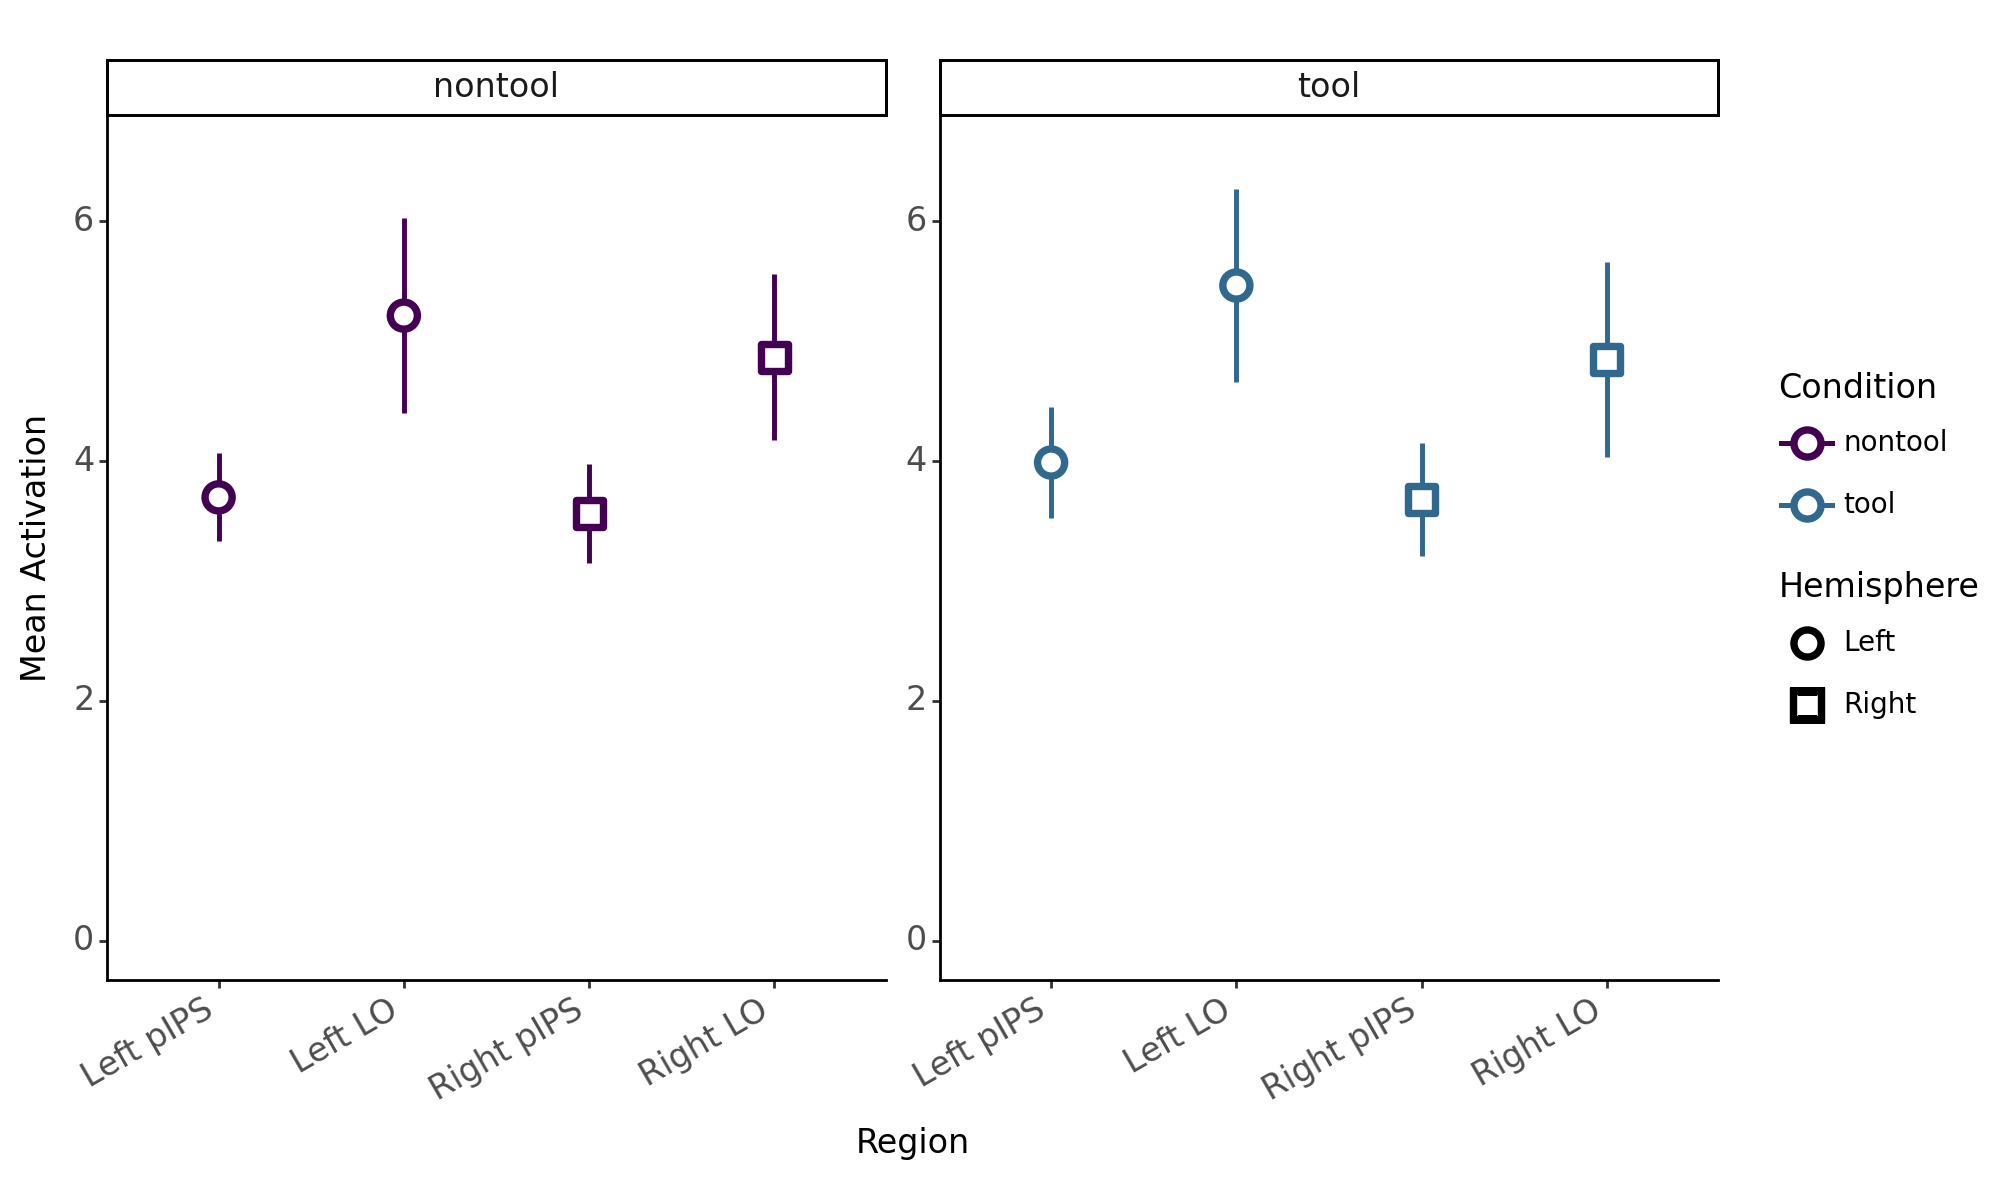

In [9]:
import pandas as pd
import numpy as np
from plotnine import (ggplot, aes, geom_point, geom_linerange, theme_classic, labs,
                      scale_color_manual, scale_shape_manual, theme, element_text, 
                      element_line, element_blank, coord_cartesian, scale_x_discrete, 
                      facet_wrap, guides, guide_legend)

# Read the CSV data with updated path
data = pd.read_csv("results/tools/selectivity/selectivity_summarytoolloc.csv")

# Filter data for spaceloc subjects and relevant ROIs
filtered_data = data[(data['sub'].str.contains('spaceloc')) &
                     (data['roi'].isin(['LO', 'pIPS'])) &
                     (data['hemi'].isin(['left', 'right']))]

# Calculate mean activation and standard deviation for each combination
summary_df = filtered_data.groupby(['hemi', 'roi', 'cond'])['mean_act'].agg(['mean', 'std', 'count']).reset_index()
summary_df['sem'] = summary_df['std'] / np.sqrt(summary_df['count'])

# Rename columns for clarity
summary_df.columns = ['Hemisphere', 'ROI', 'Condition', 'Mean', 'Std', 'Count', 'SE']

# Create more readable labels
summary_df['ROI'] = summary_df['ROI'].map({'LO': 'LO', 'pIPS': 'pIPS'})
summary_df['Hemisphere'] = summary_df['Hemisphere'].map({'left': 'Left', 'right': 'Right'})
summary_df['Region'] = summary_df['Hemisphere'] + ' ' + summary_df['ROI']

# Create a custom order for the x-axis
summary_df['Region_order'] = pd.Categorical(summary_df['Region'],
                                            categories=['Left pIPS', 'Left LO', 'Right pIPS', 'Right LO'],
                                            ordered=True)

# Function to create plot
def create_plot(data):
    plot = (ggplot(data, aes(x='Region_order', y='Mean', color='Condition', shape='Hemisphere'))
            + geom_linerange(aes(ymin='Mean-Std', ymax='Mean+Std'), size=1)
            + geom_point(size=4, fill='white', stroke=1.5)
            + theme_classic()
            + labs(x='Region', y='Mean Activation')
            + scale_color_manual(values={'tool': '#31688E', 'nontool': '#440154'})  # Updated for tool conditions
            + scale_shape_manual(values={'Left': 'o', 'Right': 's'})  # Changed Right to square for better distinction
            + theme(text=element_text(size=12),
                    axis_text_x=element_text(angle=30, hjust=1),
                    axis_line=element_line(colour="black"),
                    panel_border=element_blank(),
                    legend_position="right",
                    legend_box="vertical",
                    legend_title=element_text(size=12),
                    legend_text=element_text(size=10),
                    figure_size=(10, 6))
            + coord_cartesian(ylim=(0, data['Mean'].max() * 1.2))
            + scale_x_discrete(limits=['Left pIPS', 'Left LO', 'Right pIPS', 'Right LO'])
            + guides(color=guide_legend(title="Condition"),
                     shape=guide_legend(title="Hemisphere"))
            + facet_wrap('~ Condition', scales='free_y'))
    return plot

# Create and print plot
plot = create_plot(summary_df)
print(plot)

# Save the plot with updated path
#plot.save("results/tools/selectivity/activation_plot_combined.png", dpi=300, width=10, height=6)
# rois defined by registered native parcellation

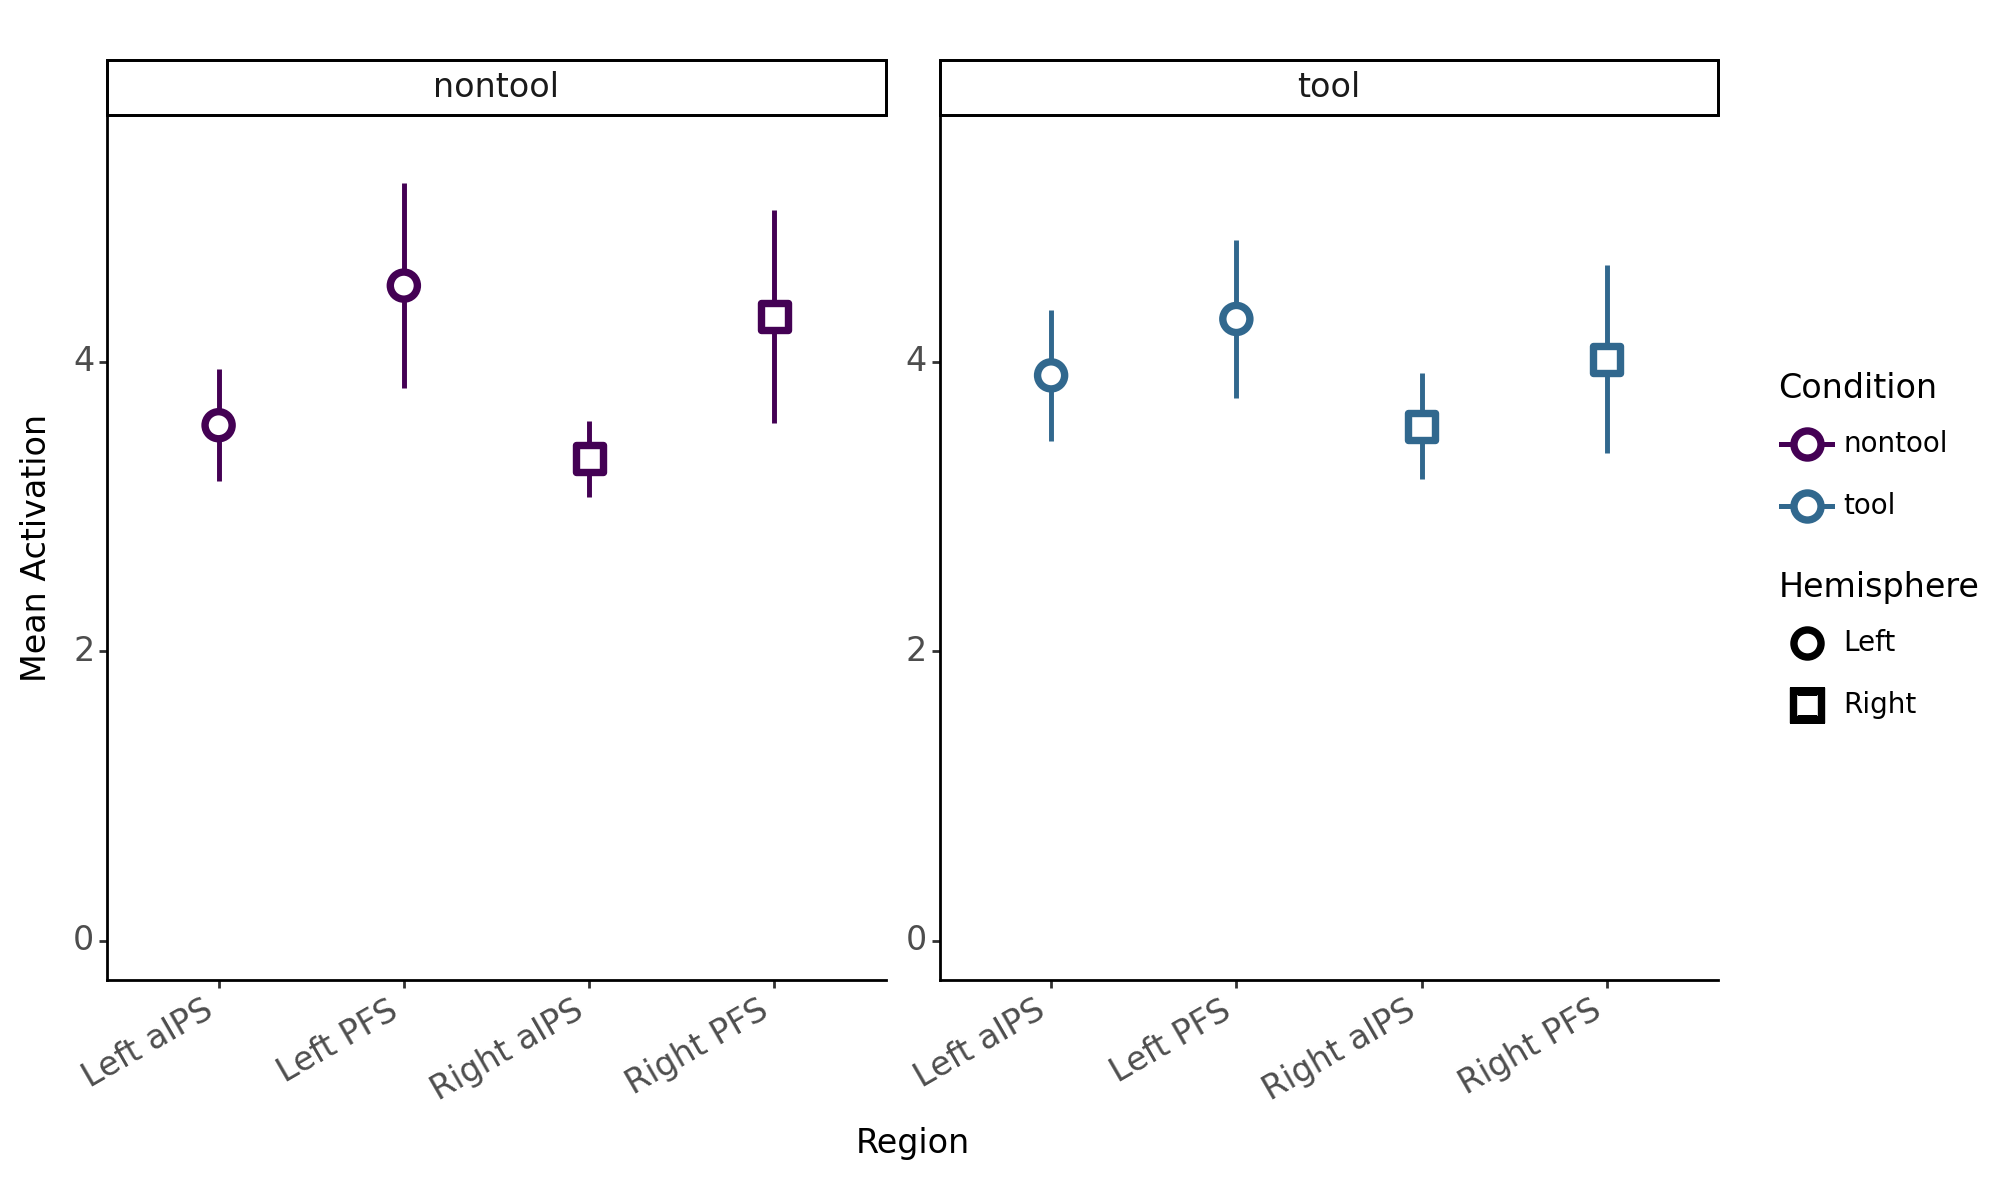

/home/csimmon2/anaconda3/envs/fmri/lib/python3.9/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 10 x 6 in image.
/home/csimmon2/anaconda3/envs/fmri/lib/python3.9/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /user_data/csimmon2/git_repos/ptoc/results/tools/selectivity/activation_plot_combined.png


In [2]:
import pandas as pd
import numpy as np
from plotnine import (ggplot, aes, geom_point, geom_linerange, theme_classic, labs,
                      scale_color_manual, scale_shape_manual, theme, element_text, 
                      element_line, element_blank, coord_cartesian, scale_x_discrete, 
                      facet_wrap, guides, guide_legend)

# Read the CSV data with updated path
data = pd.read_csv("/user_data/csimmon2/git_repos/ptoc/results/tools/selectivity/selectivity_summarytoolloc.csv")

# Filter data for spaceloc subjects and relevant ROIs
filtered_data = data[(data['sub'].str.contains('spaceloc')) &
                     (data['roi'].isin(['PFS', 'aIPS'])) &
                     (data['hemi'].isin(['left', 'right']))]

# Calculate mean activation and standard deviation for each combination
summary_df = filtered_data.groupby(['hemi', 'roi', 'cond'])['mean_act'].agg(['mean', 'std', 'count']).reset_index()
summary_df['sem'] = summary_df['std'] / np.sqrt(summary_df['count'])

# Rename columns for clarity
summary_df.columns = ['Hemisphere', 'ROI', 'Condition', 'Mean', 'Std', 'Count', 'SE']

# Create more readable labels
summary_df['ROI'] = summary_df['ROI'].map({'PFS': 'PFS', 'aIPS': 'aIPS'})
summary_df['Hemisphere'] = summary_df['Hemisphere'].map({'left': 'Left', 'right': 'Right'})
summary_df['Region'] = summary_df['Hemisphere'] + ' ' + summary_df['ROI']

# Create a custom order for the x-axis
summary_df['Region_order'] = pd.Categorical(summary_df['Region'],
                                            categories=['Left aIPS', 'Left PFS', 'Right aIPS', 'Right PFS'],
                                            ordered=True)

# Function to create plot
def create_plot(data):
    plot = (ggplot(data, aes(x='Region_order', y='Mean', color='Condition', shape='Hemisphere'))
            + geom_linerange(aes(ymin='Mean-Std', ymax='Mean+Std'), size=1)
            + geom_point(size=4, fill='white', stroke=1.5)
            + theme_classic()
            + labs(x='Region', y='Mean Activation')
            + scale_color_manual(values={'tool': '#31688E', 'nontool': '#440154'})  # Updated for tool conditions
            + scale_shape_manual(values={'Left': 'o', 'Right': 's'})  # Changed Right to square for better distinction
            + theme(text=element_text(size=12),
                    axis_text_x=element_text(angle=30, hjust=1),
                    axis_line=element_line(colour="black"),
                    panel_border=element_blank(),
                    legend_position="right",
                    legend_box="vertical",
                    legend_title=element_text(size=12),
                    legend_text=element_text(size=10),
                    figure_size=(10, 6))
            + coord_cartesian(ylim=(0, data['Mean'].max() * 1.2))
            + scale_x_discrete(limits=['Left aIPS', 'Left PFS', 'Right aIPS', 'Right PFS'])
            + guides(color=guide_legend(title="Condition"),
                     shape=guide_legend(title="Hemisphere"))
            + facet_wrap('~ Condition', scales='free_y'))
    return plot

# Create and print plot
plot = create_plot(summary_df)
print(plot)

# Save the plot with updated path
plot.save("/user_data/csimmon2/git_repos/ptoc/results/tools/selectivity/activation_plot_combined.png", dpi=300, width=10, height=6)
# rois defined by registered native parcellation

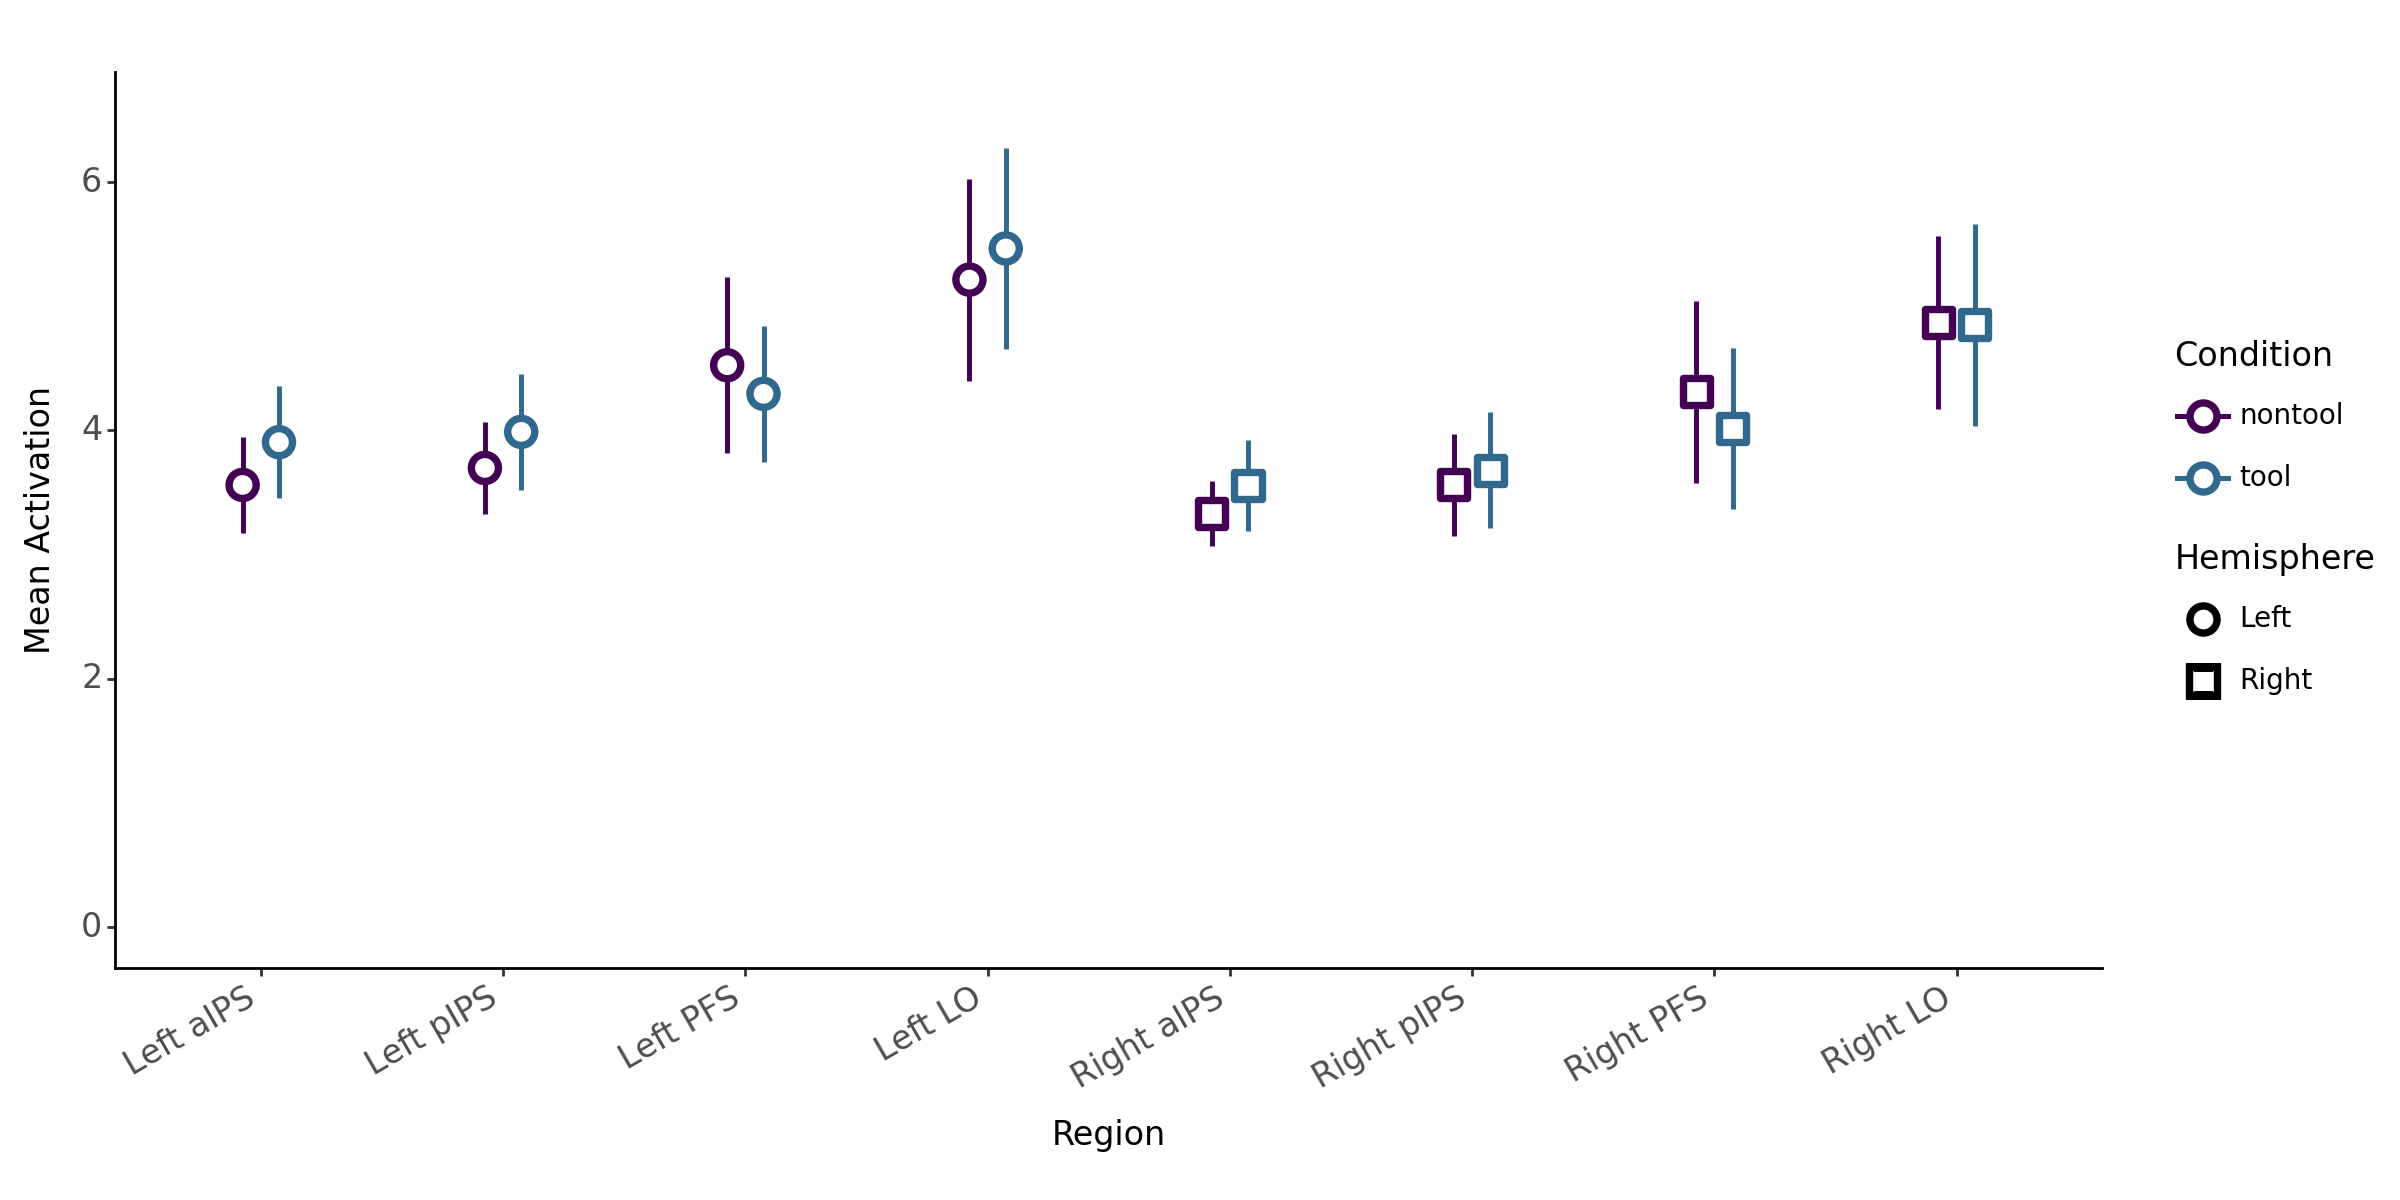

/home/csimmon2/anaconda3/envs/fmri/lib/python3.9/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 10 x 6 in image.
/home/csimmon2/anaconda3/envs/fmri/lib/python3.9/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /user_data/csimmon2/git_repos/ptoc/results/tools/selectivity/activation_plot_combined.png


In [3]:
import pandas as pd
import numpy as np
from plotnine import (ggplot, aes, geom_point, geom_linerange, theme_classic, labs,
                      scale_color_manual, scale_shape_manual, theme, element_text, 
                      element_line, element_blank, coord_cartesian, scale_x_discrete,
                      guides, guide_legend, position_dodge)

# Read and process tools data
tools_data = pd.read_csv("/user_data/csimmon2/git_repos/ptoc/results/tools/selectivity/selectivity_summarytoolloc.csv")

# Update ROI filter to include new regions
filtered_tools = tools_data[(tools_data['sub'].str.contains('spaceloc')) &
                           (tools_data['roi'].isin(['PFS', 'aIPS', 'pIPS', 'LO'])) &
                           (tools_data['hemi'].isin(['left', 'right']))]

# Calculate summary statistics
summary_df = filtered_tools.groupby(['hemi', 'roi', 'cond'])['mean_act'].agg(['mean', 'std', 'count']).reset_index()
summary_df['sem'] = summary_df['std'] / np.sqrt(summary_df['count'])

# Rename columns
summary_df.columns = ['Hemisphere', 'ROI', 'Condition', 'Mean', 'Std', 'Count', 'SE']

# Create readable labels
summary_df['ROI'] = summary_df['ROI'].map({'PFS': 'PFS', 'aIPS': 'aIPS', 'pIPS': 'pIPS', 'LO': 'LO'})
summary_df['Hemisphere'] = summary_df['Hemisphere'].map({'left': 'Left', 'right': 'Right'})
summary_df['Region'] = summary_df['Hemisphere'] + ' ' + summary_df['ROI']

# Update region ordering
summary_df['Region_order'] = pd.Categorical(summary_df['Region'],
                                          categories=['Left aIPS', 'Left pIPS', 'Left PFS', 'Left LO',
                                                    'Right aIPS', 'Right pIPS', 'Right PFS', 'Right LO'],
                                          ordered=True)

# Create plot with position dodge
dodge_width = 0.3

plot = (ggplot(summary_df, aes(x='Region_order', y='Mean', color='Condition', shape='Hemisphere'))
        + geom_linerange(aes(ymin='Mean-Std', ymax='Mean+Std'), 
                        position=position_dodge(width=dodge_width), size=1)
        + geom_point(position=position_dodge(width=dodge_width), size=4, fill='white', stroke=1.5)
        + theme_classic()
        + labs(x='Region', y='Mean Activation')
        + scale_color_manual(values={'tool': '#31688E', 'nontool': '#440154'})
        + scale_shape_manual(values={'Left': 'o', 'Right': 's'})
        + theme(text=element_text(size=12),
                axis_text_x=element_text(angle=30, hjust=1),
                axis_line=element_line(colour="black"),
                panel_border=element_blank(),
                legend_position="right",
                legend_box="vertical",
                legend_title=element_text(size=12),
                legend_text=element_text(size=10),
                figure_size=(12, 6))
        + coord_cartesian(ylim=(0, summary_df['Mean'].max() * 1.2))
        + scale_x_discrete(limits=['Left aIPS', 'Left pIPS', 'Left PFS', 'Left LO',
                                 'Right aIPS', 'Right pIPS', 'Right PFS', 'Right LO'])
        + guides(color=guide_legend(title="Condition"),
                shape=guide_legend(title="Hemisphere")))

print(plot)
plot.save("/user_data/csimmon2/git_repos/ptoc/results/tools/selectivity/activation_plot_combined.png", dpi=300, width=10, height=6)

In [10]:
# Add this analysis after creating summary_df in the previous code
print("Tool vs Non-tool Comparison by Region:")
for region in summary_df['Region'].unique():
    tool_mean = summary_df[(summary_df['Region'] == region) & (summary_df['Condition'] == 'tool')]['Mean'].values[0]
    nontool_mean = summary_df[(summary_df['Region'] == region) & (summary_df['Condition'] == 'nontool')]['Mean'].values[0]
    difference = tool_mean - nontool_mean
    percent_diff = (difference / nontool_mean) * 100
    
    print(f"\n{region}:")
    print(f"Tool mean: {tool_mean:.2f}")
    print(f"Non-tool mean: {nontool_mean:.2f}")
    print(f"Difference: {difference:.2f}")
    print(f"Percent difference: {percent_diff:.1f}%")

Tool vs Non-tool Comparison by Region:

Left LO:
Tool mean: 5.47
Non-tool mean: 5.21
Difference: 0.25
Percent difference: 4.8%

Left pIPS:
Tool mean: 3.99
Non-tool mean: 3.70
Difference: 0.29
Percent difference: 7.9%

Right LO:
Tool mean: 4.85
Non-tool mean: 4.87
Difference: -0.02
Percent difference: -0.4%

Right pIPS:
Tool mean: 3.68
Non-tool mean: 3.56
Difference: 0.12
Percent difference: 3.3%


In [11]:
# Let's check if we're using the correct cope numbers
print("Unique conditions in data:")
print(filtered_data['cond'].unique())

# Check if we're getting data from the right contrasts
print("\nLet's look at the full contrast structure:")
print(filtered_data.groupby('cond')['mean_act'].count())

# Check if we're averaging what we think we are
print("\nSample of raw data points:")
print(filtered_data[['sub', 'roi', 'hemi', 'cond', 'mean_act']].head(10))

Unique conditions in data:
['tool' 'nontool']

Let's look at the full contrast structure:
cond
nontool    72
tool       72
Name: mean_act, dtype: int64

Sample of raw data points:
                 sub   roi   hemi     cond  mean_act
0   sub-spaceloc1001    LO   left     tool  6.136708
1   sub-spaceloc1001    LO   left  nontool  5.740684
4   sub-spaceloc1001  pIPS   left     tool  4.589363
5   sub-spaceloc1001  pIPS   left  nontool  3.966929
8   sub-spaceloc1001    LO  right     tool  5.148570
9   sub-spaceloc1001    LO  right  nontool  4.978732
12  sub-spaceloc1001  pIPS  right     tool  4.362646
13  sub-spaceloc1001  pIPS  right  nontool  3.776692
16  sub-spaceloc1002    LO   left     tool  6.700597
17  sub-spaceloc1002    LO   left  nontool  6.603218


In [12]:
# Let's check how many voxels we're getting per ROI
print("\nROI sizes:")
print(filtered_data.groupby(['roi', 'hemi'])['roi_size'].mean())


ROI sizes:
roi   hemi 
LO    left     16648.222222
      right    16801.666667
pIPS  left     30253.777778
      right    27094.055556
Name: roi_size, dtype: float64


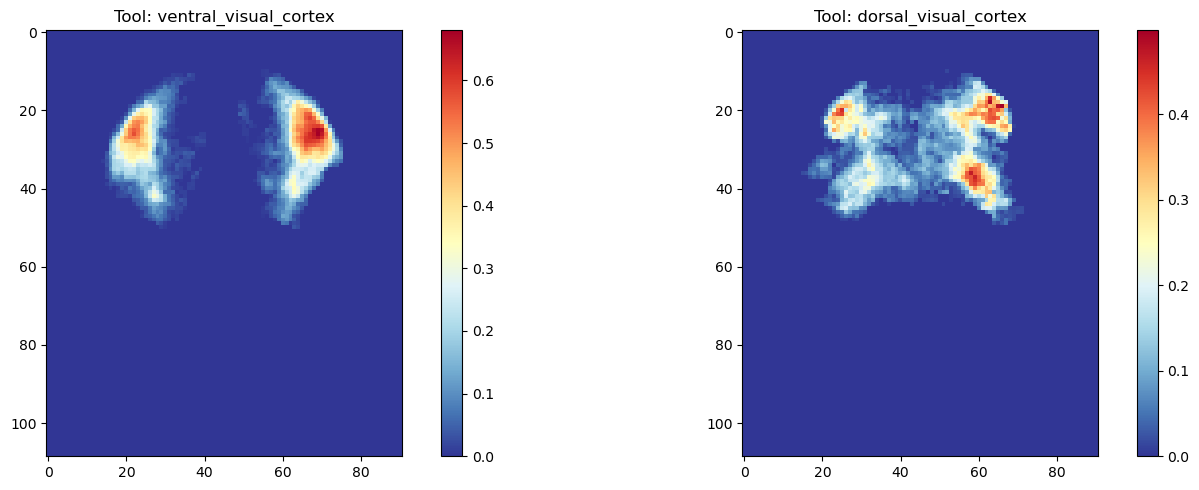

In [6]:
import sys
import matplotlib.pyplot as plt
import numpy as np

curr_dir = f'/user_data/csimmon2/git_repos/ptoc'
sys.path.insert(0,curr_dir)
import ptoc_params as params

results_dir = params.results_dir 

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

for idx, roi_type in enumerate(['ventral_visual_cortex', 'dorsal_visual_cortex']):
    data = np.load(f'{results_dir}/neural_map/{roi_type}_tool_func.npy')
    im = ax[idx].imshow(data, cmap='RdYlBu_r')
    plt.colorbar(im, ax=ax[idx])
    ax[idx].set_title(f'Tool: {roi_type}')

plt.tight_layout()
plt.show()

/tmp/ipykernel_26524/1332679642.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


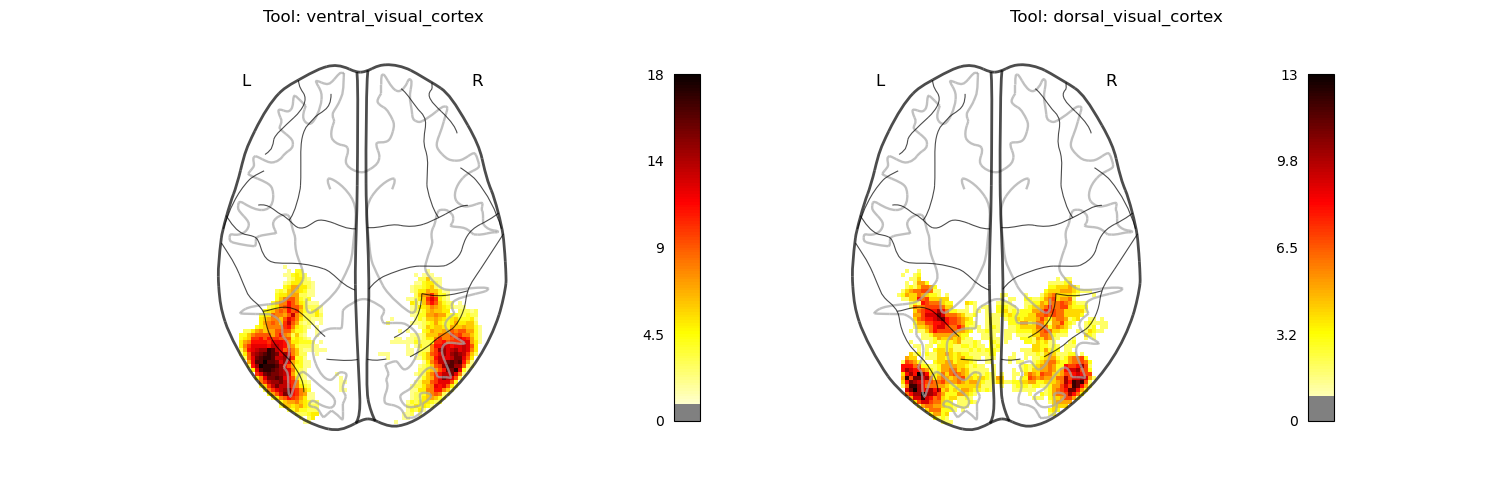

In [7]:
import matplotlib.pyplot as plt
from nilearn import plotting

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

for idx, roi_type in enumerate(['ventral_visual_cortex', 'dorsal_visual_cortex']):
   nii_img = f'{results_dir}/neural_map/{roi_type}_tool_group.nii.gz'
   display = plotting.plot_glass_brain(
       nii_img, 
       axes=ax[idx],
       threshold=1, # Adjust this threshold as needed
       colorbar=True,
       display_mode='z' # Try 'x', 'y', 'z', 'l', 'r' or 'ortho'
   )
   ax[idx].set_title(f'Tool: {roi_type}')

plt.tight_layout()
plt.show()

/tmp/ipykernel_26524/1261316876.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


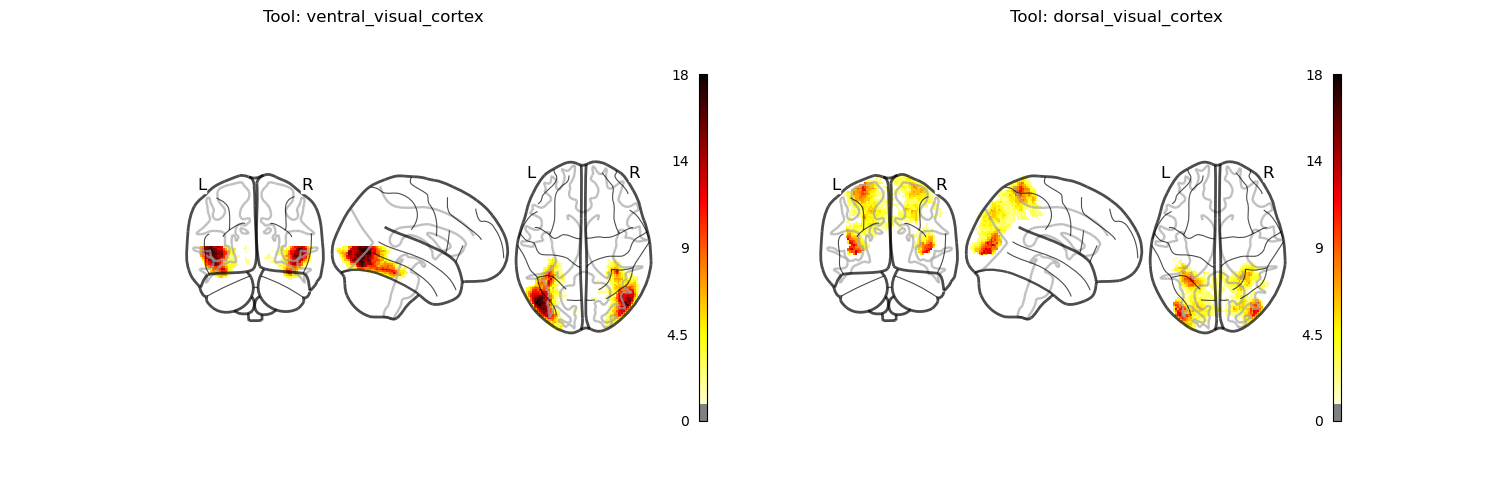

In [13]:
import matplotlib.pyplot as plt
from nilearn import plotting, image
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Get max value across both ROIs
vmax = 0
for roi_type in ['ventral_visual_cortex', 'dorsal_visual_cortex']:
   nii_img = f'{results_dir}/neural_map/{roi_type}_tool_group.nii.gz'
   img_data = image.load_img(nii_img).get_fdata()
   vmax = max(vmax, np.max(img_data))

# Plot with consistent scale
for idx, roi_type in enumerate(['ventral_visual_cortex', 'dorsal_visual_cortex']):
   nii_img = f'{results_dir}/neural_map/{roi_type}_tool_group.nii.gz'
   display = plotting.plot_glass_brain(
       nii_img,
       axes=ax[idx],
       threshold=1,
       colorbar=True,
       display_mode='ortho',
       vmax=vmax
   )
   ax[idx].set_title(f'Tool: {roi_type}')

plt.tight_layout()
plt.show()

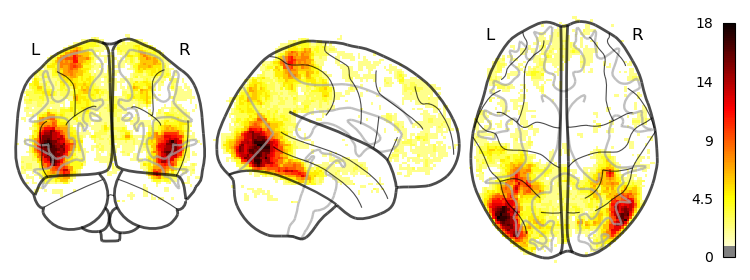

In [11]:
nii_img = f'{results_dir}/neural_map/tool_whole_brain_group.nii.gz'
display = plotting.plot_glass_brain(
    nii_img,
    threshold=1,
    colorbar=True,
    display_mode='ortho'
)
plt.show()


Peak coordinates for this subject:
      roi          x          y          z
0   lpIPS -26.389740 -67.441808  44.886542
1   rpIPS  21.630218 -68.875414  44.958684
2     lLO -49.094463 -50.498181  25.229398
3     rLO  40.812284 -55.208414  23.645350
4    lPFS -33.449742 -15.563712   8.833550
5    rPFS  35.308443 -21.151033  11.487973
6   laIPS -26.389740 -67.441808  44.886542
7   raIPS  21.630218 -68.875414  44.958684
16  lpIPS -43.078597 -63.177423  38.231155
17  rpIPS  23.055588 -63.027733  44.079515
18    lLO -49.094463 -50.498181  25.229398
19    rLO  38.885785 -54.228010  22.493235
20   lPFS -36.647242 -17.866208  12.220941
21   rPFS  37.357061 -21.194375   5.421570
22  laIPS -30.373653 -66.861985  46.833869
23  raIPS  23.055588 -63.027733  44.079515
32  lpIPS -43.078597 -63.177423  38.231155
33  rpIPS  23.055588 -63.027733  44.079515
34    lLO -49.094463 -50.498181  25.229398
35    rLO  38.885785 -54.228010  22.493235
36   lPFS -36.647242 -17.866208  12.220941
37   rPFS  37.3570

<Figure size 2000x1000 with 0 Axes>

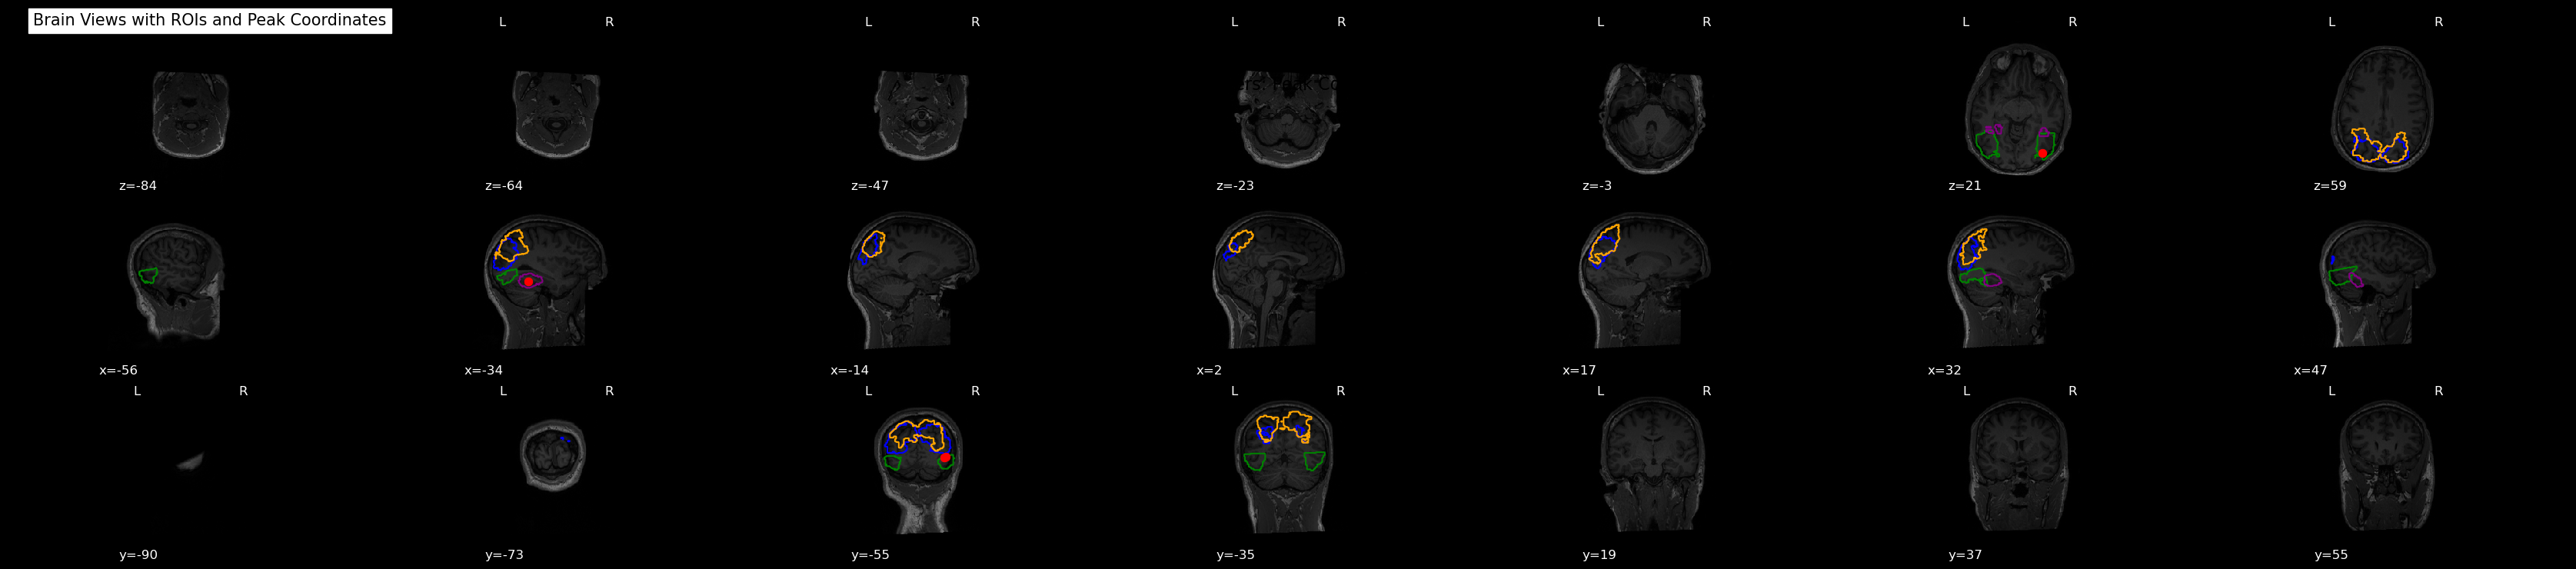

In [16]:
import os
import pandas as pd
import numpy as np
from nilearn import plotting, image
import matplotlib.pyplot as plt
import ptoc_params as params

# Reuse the directory paths
raw_dir = params.raw_dir
sub_dir = '/user_data/csimmon2/temp_derivatives/{sub}/ses-01'
roi_dir = os.path.join(raw_dir, '{sub}/ses-01/derivatives/rois')
parcel_dir = os.path.join(raw_dir, '{sub}/ses-01/derivatives/rois/parcels')

# Read the coordinates file
coords_df = pd.read_csv('/user_data/csimmon2/git_repos/ptoc/tools/roi_coordinates.csv')

def plot_rois_and_peaks(subject_id='sub-spaceloc1001', condition='tools'):
    """
    Plot ROI parcels and peak coordinates on subject's anatomical image with debugging info.
    """
    # Load the anatomical image
    anat_path = os.path.join(raw_dir, f"{subject_id}/ses-01/anat/{subject_id}_ses-01_T1w.nii.gz")
    anat_img = image.load_img(anat_path)
    
    # Get subject-specific coordinates and print them for debugging
    subject_coords = coords_df[
        (coords_df['subject'] == subject_id) & 
        (coords_df['condition'] == condition)
    ]
    print("\nPeak coordinates for this subject:")
    print(subject_coords[['roi', 'x', 'y', 'z']].to_string())
    
    # Create a figure
    fig = plt.figure(figsize=(20, 10))
    
    # Define distinct colors for each ROI
    roi_colors = {
        'pIPS': 'blue',
        'LO': 'green',
        'PFS': 'purple',
        'aIPS': 'orange'
    }
    
    # Create the mosaic display
    display = plotting.plot_anat(
        anat_img,
        display_mode='mosaic',
        title='Brain Views with ROIs and Peak Coordinates'
    )
    
    # Plot each ROI parcel with its specific color
    for parcel, color in roi_colors.items():
        roi_path = os.path.join(parcel_dir.format(sub=subject_id), f"{parcel}.nii.gz")
        if os.path.exists(roi_path):
            roi_img = image.load_img(roi_path)
            display.add_contours(roi_img, colors=color, linewidths=1.5, levels=[0.5])
    
    # Plot peak coordinates with smaller marker size
    if not subject_coords.empty:
        display.add_markers(
            subject_coords[['x', 'y', 'z']].values,
            marker_color='red',
            marker_size=50  # Reduced from 100 to 50
        )
    
    # Add title with legend information
    plt.suptitle(f"Subject {subject_id} - {condition.capitalize()} Condition\n" + 
                 "ROIs: " + 
                 ", ".join([f"{roi} ({color})" for roi, color in roi_colors.items()]) +
                 "\nRed Markers: Peak Coordinates", 
                 y=0.95, fontsize=16)
    
    return fig

# Plot subject with debugging information
plot_rois_and_peaks()
plt.show()

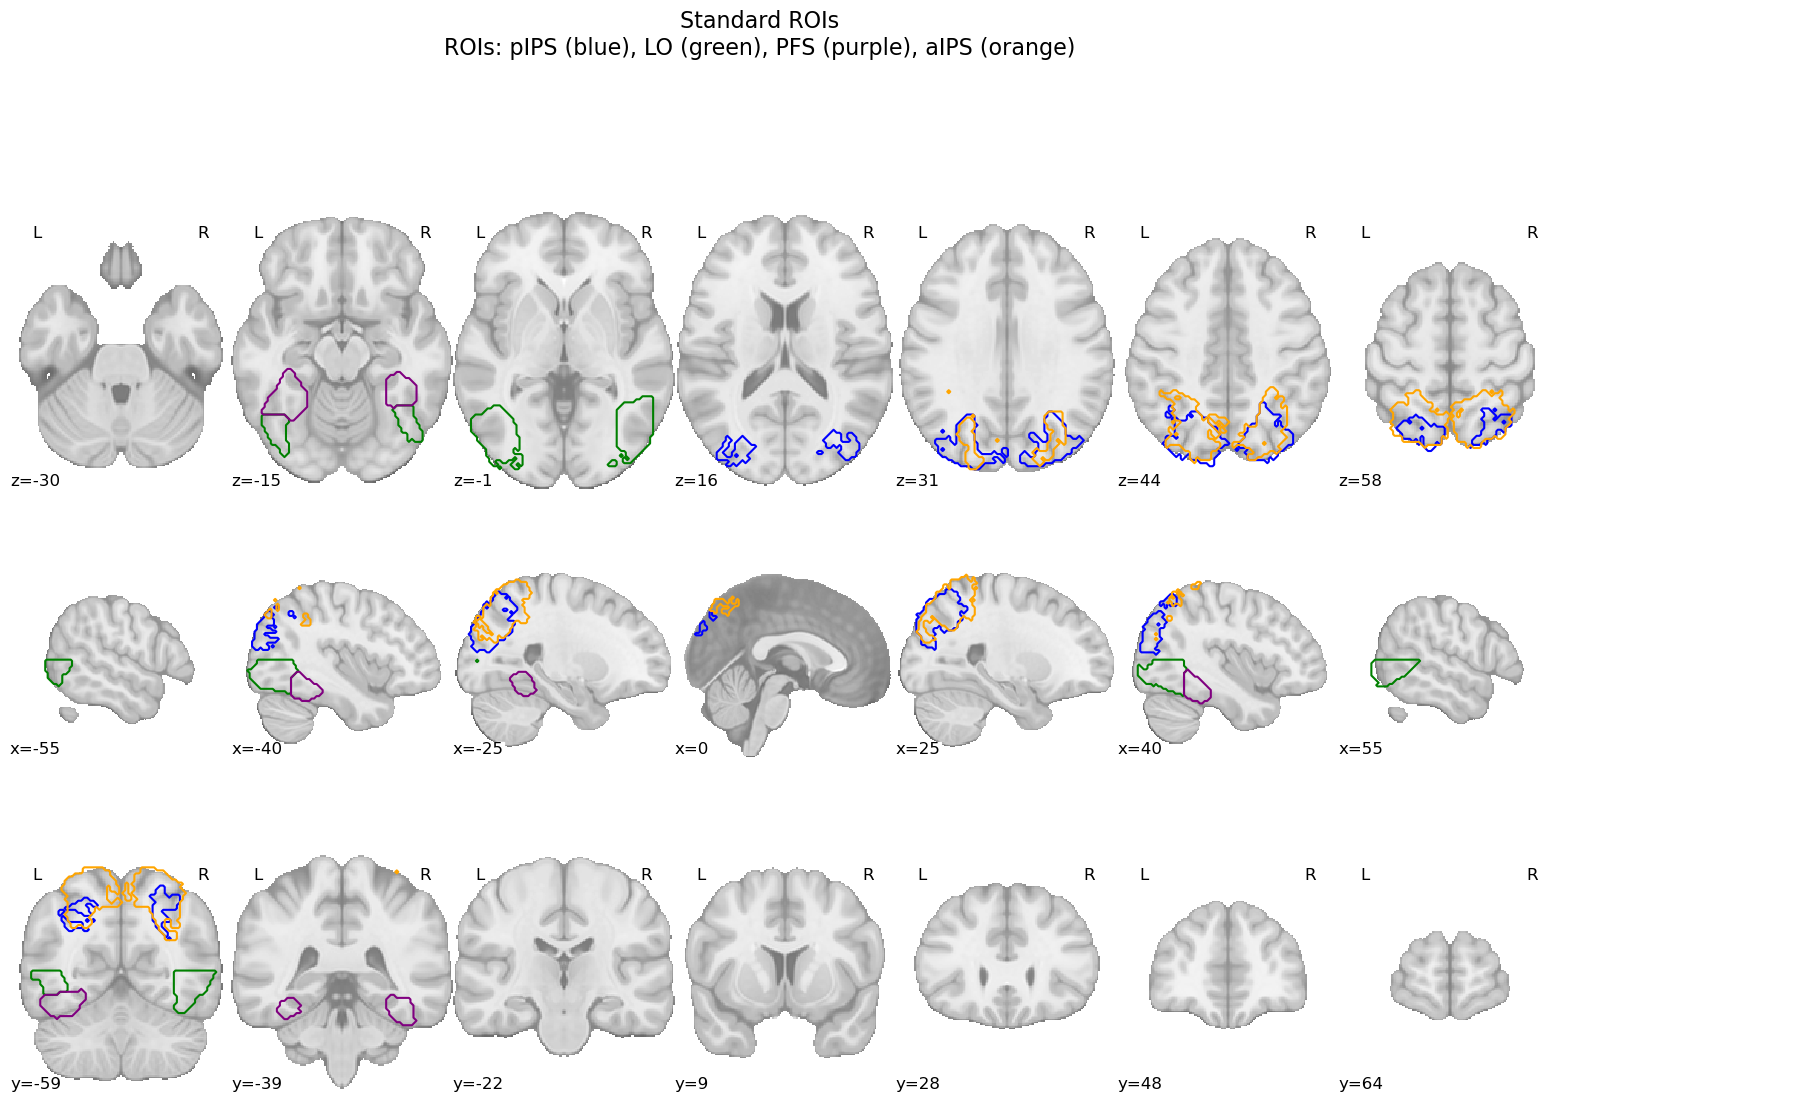

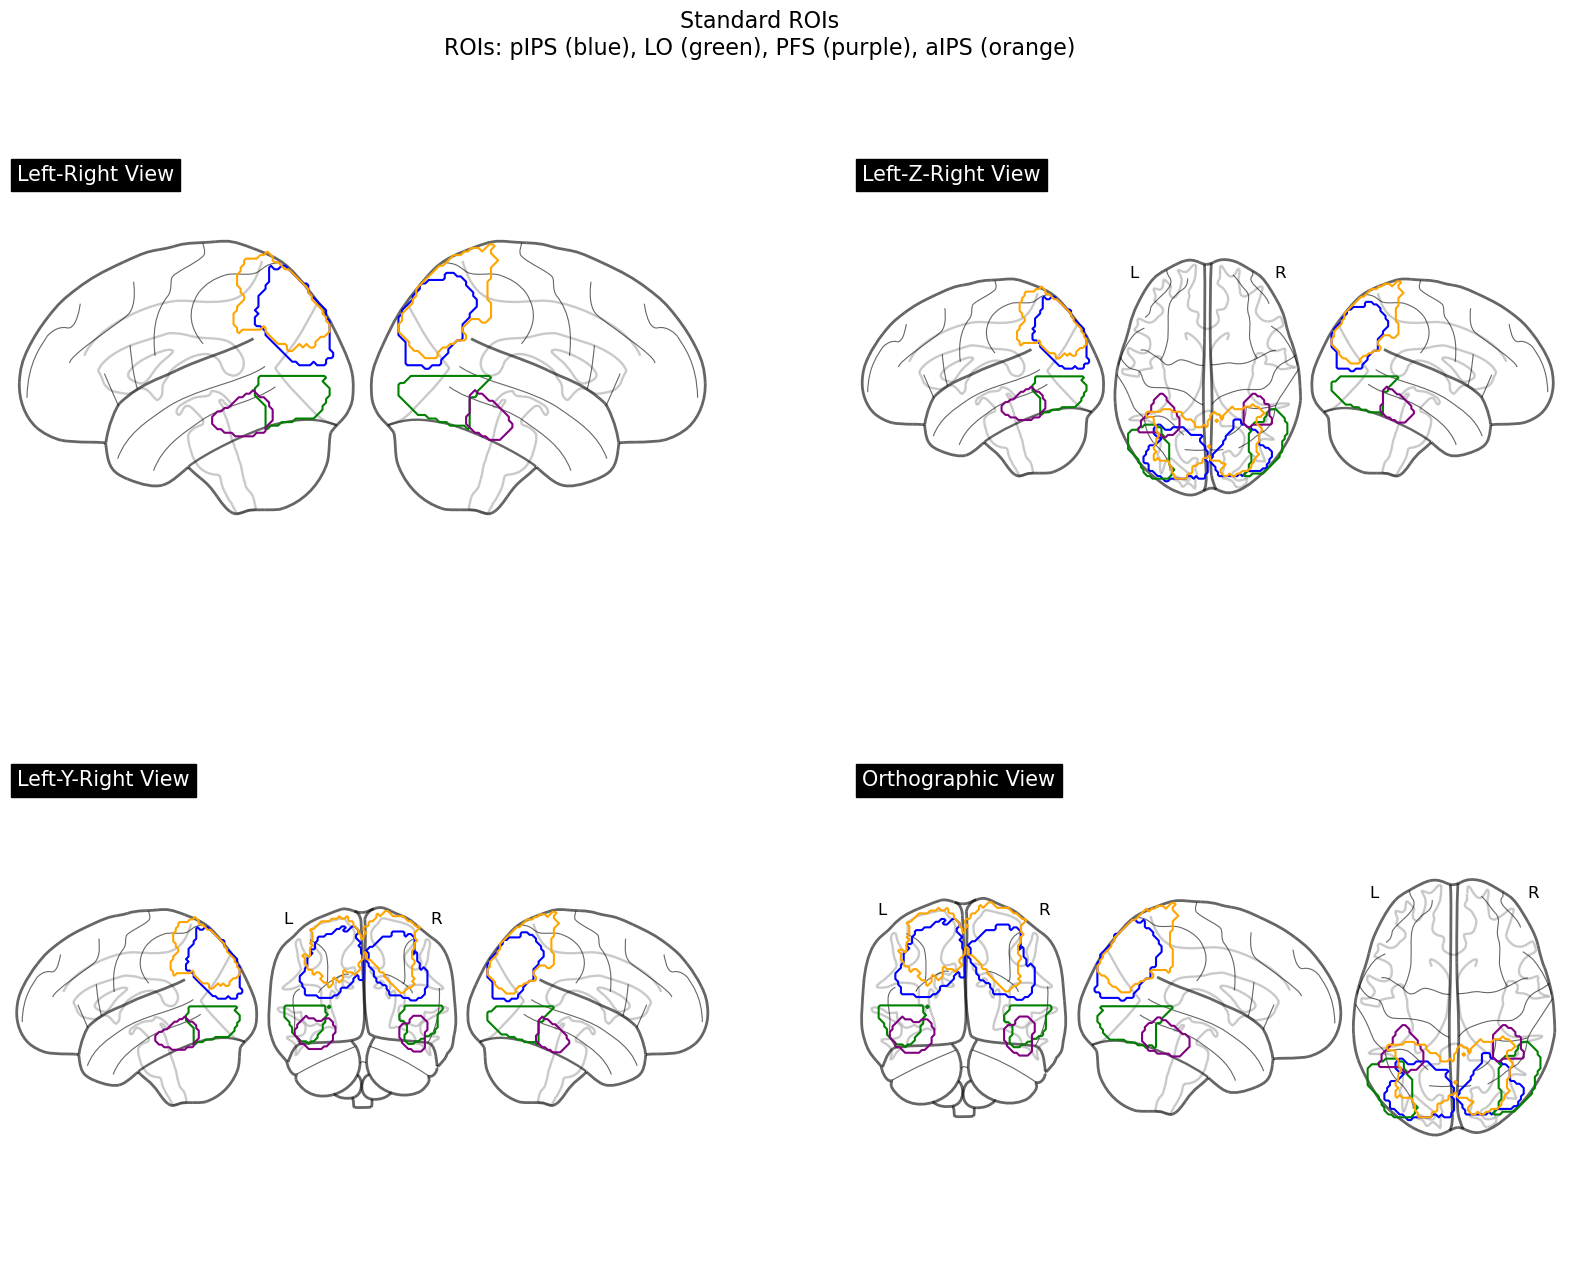

In [17]:
import os
import numpy as np
from nilearn import plotting, image
import matplotlib.pyplot as plt

def plot_standard_rois(plot_type='mosaic'):
    """
    Plot standard ROI parcels on standard brain.
    
    Args:
        plot_type (str): Either 'mosaic' or 'glass_brain'
    """
    # Define the path to standard ROIs
    std_parcel_dir = '/user_data/csimmon2/git_repos/ptoc/roiParcels'
    
    # Define distinct colors for each ROI
    roi_colors = {
        'pIPS': 'blue',
        'LO': 'green',
        'PFS': 'purple',
        'aIPS': 'orange'
    }
    
    if plot_type == 'mosaic':
        # Create a figure with adjusted height for title
        fig = plt.figure(figsize=(20, 12))
        
        # Create the mosaic display
        display = plotting.plot_anat(
            display_mode='mosaic',
            draw_cross=False,
            annotate=True,
            axes=plt.gca()
        )
        
        # Plot each ROI parcel with its specific color
        for parcel, color in roi_colors.items():
            roi_path = os.path.join(std_parcel_dir, f"{parcel}.nii.gz")
            if os.path.exists(roi_path):
                roi_img = image.load_img(roi_path)
                display.add_contours(roi_img, colors=color, linewidths=1.5, levels=[0.5])
        
        # Add title with ROI information
        plt.suptitle("Standard ROIs\n" + 
                    "ROIs: " + 
                    ", ".join([f"{roi} ({color})" for roi, color in roi_colors.items()]),
                    y=0.95, fontsize=16)
        
    elif plot_type == 'glass_brain':
        # Create a figure
        fig = plt.figure(figsize=(20, 15))
        
        # Create displays for different views
        views = {
            'lr': (221, 'Left-Right View'),
            'lzr': (222, 'Left-Z-Right View'),
            'lyr': (223, 'Left-Y-Right View'),
            'ortho': (224, 'Orthographic View')
        }
        
        for view, (position, title) in views.items():
            ax = plt.subplot(position)
            display = plotting.plot_glass_brain(
                None,
                display_mode=view,
                plot_abs=False,
                alpha=0.6,
                axes=ax,
                title=title
            )
            
            # Plot each ROI parcel
            for parcel, color in roi_colors.items():
                roi_path = os.path.join(std_parcel_dir, f"{parcel}.nii.gz")
                if os.path.exists(roi_path):
                    roi_img = image.load_img(roi_path)
                    display.add_contours(roi_img, colors=color, linewidths=1.5, levels=[0.5])
        
        # Add title with legend information, positioned higher
        plt.suptitle("Standard ROIs\n" + 
                    "ROIs: " + 
                    ", ".join([f"{roi} ({color})" for roi, color in roi_colors.items()]),
                    y=0.95, fontsize=16)
        
        # Adjust subplot spacing to prevent title overlap
        plt.subplots_adjust(top=0.85)
    
    return fig

# Example usage:
# For mosaic view
fig_mosaic = plot_standard_rois('mosaic')
plt.show()

# For glass brain view
fig_glass = plot_standard_rois('glass_brain')
plt.show()
